# Mathieu Characteristic Values

Julia Code by Marcus Silva, based on MATLAB code by Dan Greenbaum

In [1]:
using MathieuFunctions, PyPlot

INFO: Recompiling stale cache file /Users/marcusps/.julia/lib/v0.5/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /Users/marcusps/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


Here are the characteristic values for positive and negative $q$, for various indices of $A$ and $B$.

In [7]:
Pkg.test("MathieuFunctions")

INFO: Testing MathieuFunctions
INFO: MathieuFunctions tests passed


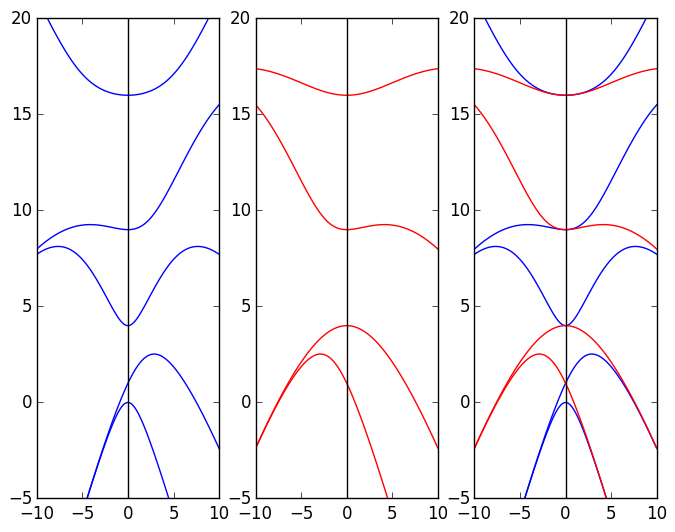

(-5,20)

In [2]:
qs = linspace(-10,10,100)

subplot(1,3,1)
plot(qs,[charA(q,k=0:4) for q in qs],"b-") # a_0
axvline(x=0,color="k")
ylim(-5,20)

subplot(1,3,2)
plot(qs,[charB(q,k=1:5) for q in qs],"r-") # a_0
axvline(x=0,color="k")
ylim(-5,20)

subplot(1,3,3)
plot(qs,[charA(q,k=0:4) for q in qs],"b-") # a_0
plot(qs,[charB(q,k=1:5) for q in qs],"r-") # a_0
axvline(x=0,color="k")
ylim(-5,20)


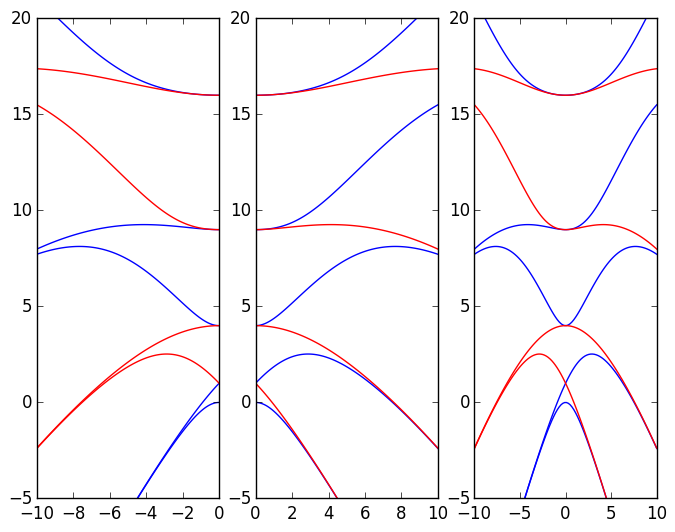

(-5,20)

In [3]:
qs = linspace(0,10,100)

subplot(1,3,1)
plot(-qs,[charA(q,k=0:4) for q in -qs],"b-") # a_0
plot(-qs,[charB(q,k=1:5) for q in -qs],"r-") # a_0
ylim(-5,20)

subplot(1,3,2)
plot(qs,[charA(q,k=0:4) for q in qs],"b-") # a_0
plot(qs,[charB(q,k=1:5) for q in qs],"r-") # a_0
ylim(-5,20)

subplot(1,3,3)
qs_pm = linspace(-10,10,100)
plot(qs_pm,[charA(q,k=0:4) for q in qs_pm],"b-") # a_0
plot(qs_pm,[charB(q,k=1:5) for q in qs_pm],"r-") # a_0
ylim(-5,20)

To double check, here are the $A$ and $B$ characteristic values writen as $\lambda$ characteristic values, compared to how they are computed by the various function (the two plots should be identical). For reference, see [DLMF @ NIST](http://dlmf.nist.gov/28.2.F1.mag)

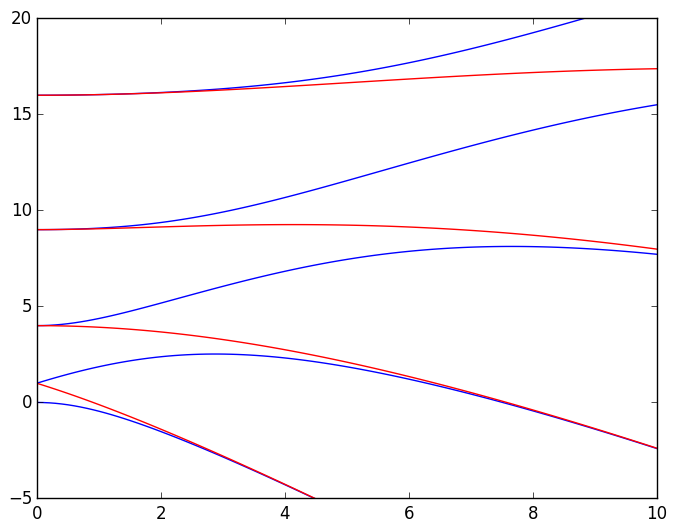

(-5,20)

In [6]:
qs = linspace(0,10,100)

plot(qs,[charλ(0,q,k=1:1) for q in qs],"b-") # a_0
plot(qs,[charλ(1,q,k=2:2) for q in qs],"b-") # a_0
plot(qs,[charλ(0,q,k=3:3) for q in qs],"b-") # a_0
plot(qs,[charλ(1,q,k=4:4) for q in qs],"b-") # a_0
plot(qs,[charλ(0,q,k=5:5) for q in qs],"b-") # a_0

plot(qs,[charλ(1,q,k=1:1) for q in qs],"r-") # a_0
plot(qs,[charλ(0,q,k=2:2) for q in qs],"r-") # a_0
plot(qs,[charλ(1,q,k=3:3) for q in qs],"r-") # a_0
plot(qs,[charλ(0,q,k=4:4) for q in qs],"r-") # a_0
ylim(-5,20)

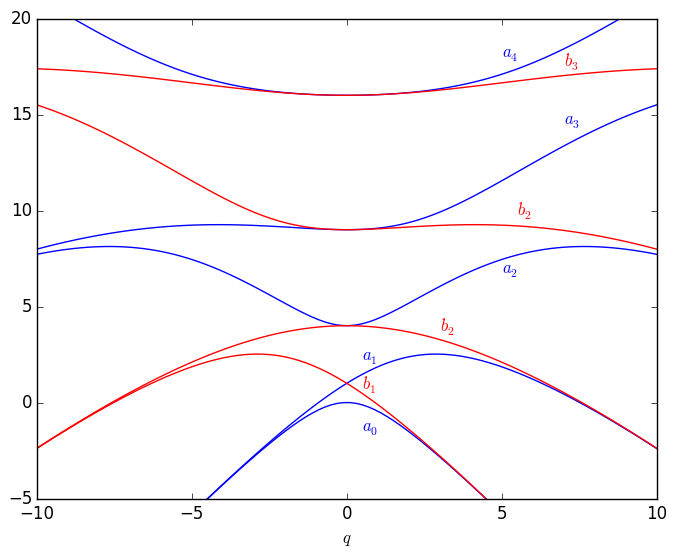

In [5]:
#qs = linspace(0,10,100)
qs = linspace(-10,10,100)

plot(qs,[charA(q,k=0:4) for q in qs],"b-") # a_0
plot(qs,[charB(q,k=1:5) for q in qs],"r-") # a_0
xlabel(L"$q$")
annotate(L"$a_0$", xy=(0.5, -1.5),color="b")
annotate(L"$b_1$", xy=(0.5, 0.7),color="r")
annotate(L"$a_1$", xy=(0.5, 2.20),color="b")
annotate(L"$b_2$", xy=(3, 3.7),color="r")
annotate(L"$a_2$", xy=(5, 6.75),color="b")
annotate(L"$b_2$", xy=(5.5, 9.75),color="r")
annotate(L"$a_3$", xy=(7, 14.5),color="b")
annotate(L"$b_3$", xy=(7, 17.5),color="r")
annotate(L"$a_4$", xy=(5, 18),color="b")
ylim(-5,20)

savefig("./doc/reproduction-of-dlmf-28.2.1.png")

With seems in good agreement with ![DTMF @ NIST](http://dlmf.nist.gov/28/2/F1.mag.png)

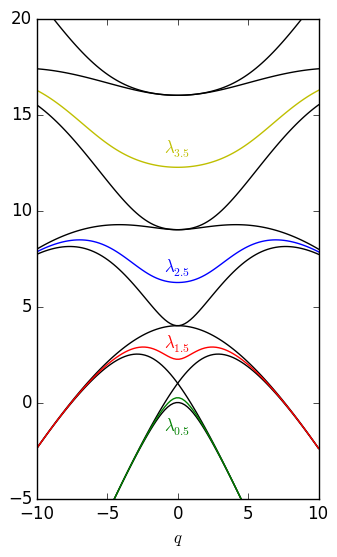

In [43]:
qs = linspace(-10,10,100)

subplot(1,2,1)
plot(qs,[charA(q,k=0:4) for q in qs],"k-") # a_k
plot(qs,[charB(q,k=1:5) for q in qs],"k-") # b_k

plot(qs,[charλ(0.5,q,k=1:1) for q in qs],"g-")
plot(qs,[charλ(0.5,q,k=2:2) for q in qs],"r-")
plot(qs,[charλ(0.5,q,k=3:3) for q in qs],"b-")
plot(qs,[charλ(0.5,q,k=4:4) for q in qs],"y-")

xlabel(L"$q$")
annotate(L"$\lambda_{0.5}$", xy=(-1, -1.5),color="g")
annotate(L"$\lambda_{1.5}$", xy=(-1, 2.8),color="r")
annotate(L"$\lambda_{2.5}$", xy=(-1, 6.8),color="b")
annotate(L"$\lambda_{3.5}$", xy=(-1, 13),color="y")

ylim(-5,20)

savefig("./doc/reproduction-of-dlmf-28.13.1.png")

The "real" test is the charge dependency of the spectrum

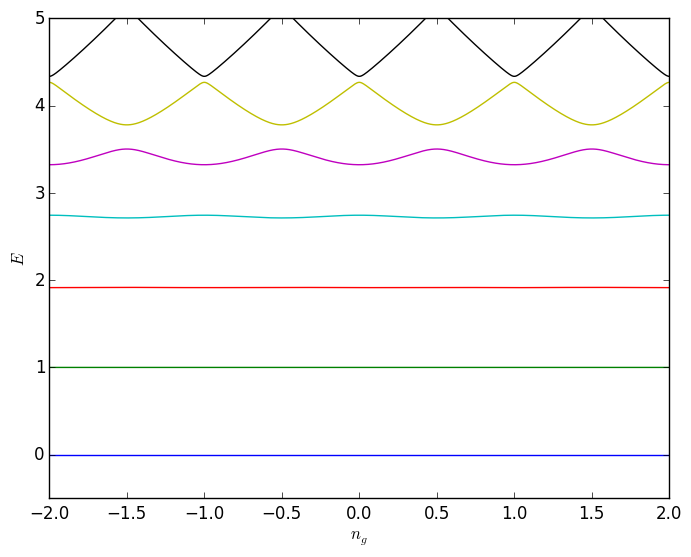

In [9]:
EJoverEC = 30;
EC       = 1;#0.34; # GHz
nLevels  = 10;
nCharge  = 2; #0.5;
nData    = 1001;

Nstart = 5;

q = -(1/2)*EJoverEC;
tol = 1e-12;

ng = linspace(-nCharge,nCharge,nData);
nu = -2*ng;

a = zeros(nData,nLevels);
N = zeros(nData,1);
Err = zeros(nData,1);
for i=1:nData
    #println(nu[i])
    a[i,:] = charλ(nu[i],q,k=1:nLevels);
end

E = EC*a;
Eng_half = charλ(-1,q,k=1:nLevels);
Eng_0    = charλ( 0,q,k=1:nLevels);
E01      = Eng_half[2] - Eng_half[1];

plot(ng,(E-Eng_0[1])/E01);
ylabel(L"$E$")
xlabel(L"$n_g$")
ylim(-.5,5)

savefig("doc/transmon-levels.png")

## Tests

In [51]:
begin
    N = 100
    norm(CharacteristicA(0,k=0:N) - [0:N;].^2) == 0
end

true

In [52]:
begin
    N = 100
    norm(CharacteristicB(0,k=1:N) - [1:N;].^2) == 0
end

true

In [53]:
begin
    test1 = readcsv("./test/MathieuCharacteristicA-1.csv");
    (test1 - reduce(hcat,Vector{Float64}[CharacteristicA(q,k=0:10) for q in [-10:.01:10;]]) |> abs |> maximum) < 1e-12
end

true

In [54]:
begin
    test1 = readcsv("./test/MathieuCharacteristicA-2.csv");
    (test1 - reduce(hcat,Vector{Float64}[CharacteristicA(q,k=0:3) for q in [30:.01:50;]]) |> abs |> maximum) < 1e-12
end

true

In [55]:
begin
    test1 = readcsv("./test/MathieuCharacteristicB-1.csv");
    (test1 - reduce(hcat,Vector{Float64}[CharacteristicB(q,k=1:10) for q in [-10:.01:10;]]) |> abs |> maximum) < 1e-12
end

true

In [56]:
begin
    test1 = readcsv("./test/MathieuCharacteristicB-2.csv");
    (test1 - reduce(hcat,Vector{Float64}[CharacteristicB(q,k=1:3) for q in [30:.01:50;]]) |> abs |> maximum) < 3e-11
end

true

In [72]:
[Characteristicλ(ν,q,k=1:1)[1] for ν in [0:.01:2;], q in [30:.01:50;]] 

201x2001 Array{Any,2}:
 -49.3017  -49.3199  -49.338  -49.3562  …  -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562  …  -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562  …  -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
 -49.3017  -49.3199  -49.338  -49.3562     -86.0754  -86.094  -86.1125
   ⋮                                    ⋱             

In [73]:
begin
    test1 = readcsv("./test/MathieuCharacteristicL-1.csv")
    #(test1 - reduce(hcat,Vector{Float64}[Characteristicλ(ν,q,k=1:1)[1] for ν in [0:.01:2;], q in [30:.01:50;]]) |> abs |> maximum) < 3e-11
end

201x1001 Array{Float64,2}:
 -5.80005  -5.78458  -5.76912  -5.75366  …  -5.76912  -5.78458  -5.80005
 -5.80004  -5.78458  -5.76911  -5.75366     -5.76911  -5.78458  -5.80004
 -5.80004  -5.78457  -5.76911  -5.75365     -5.76911  -5.78457  -5.80004
 -5.80002  -5.78456  -5.76909  -5.75364     -5.76909  -5.78456  -5.80002
 -5.80001  -5.78454  -5.76908  -5.75362     -5.76908  -5.78454  -5.80001
 -5.79998  -5.78452  -5.76905  -5.7536   …  -5.76905  -5.78452  -5.79998
 -5.79996  -5.78449  -5.76903  -5.75357     -5.76903  -5.78449  -5.79996
 -5.79993  -5.78446  -5.769    -5.75354     -5.769    -5.78446  -5.79993
 -5.79989  -5.78442  -5.76896  -5.7535      -5.76896  -5.78442  -5.79989
 -5.79985  -5.78438  -5.76892  -5.75346     -5.76892  -5.78438  -5.79985
 -5.7998   -5.78433  -5.76887  -5.75341  …  -5.76887  -5.78433  -5.7998 
 -5.79975  -5.78428  -5.76882  -5.75336     -5.76882  -5.78428  -5.79975
 -5.7997   -5.78423  -5.76876  -5.7533      -5.76876  -5.78423  -5.7997 
  ⋮                     

?MathieuCharacteristicA

MathieuCharacteristicA[r,q] gives the characteristic value Subscript[a, r] for even Mathieu functions with characteristic exponent r and parameter q.  >>


Export["MathieuCharacteristicL-1.csv", 
 Table[MathieuCharacteristicA[k, q], {k, 0, 2, 0.01}, {q, -5, 5, .01}]]

"MathieuCharacteristicL-1.csv"

Export["MathieuCharacteristicL-2.csv", 
 Table[MathieuCharacteristicA[k, q], {k, 0, 2, 0.01}, {q, 30, 
   50, .01}]]

"MathieuCharacteristicL-2.csv"